In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp

In [107]:
df=pd.read_csv("weatherAUS_rainfall_prediction_dataset_cleaned.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,...,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,No,No
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,...,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,No,No
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.6,7.61,NE,52.0,NNE,...,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,No,Yes
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.8,7.61,NNE,50.0,NW,...,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,Yes,Yes
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.6,7.61,NW,30.0,WNW,...,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,Yes,Yes


In [108]:
df.shape

(145460, 23)

In [109]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [111]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.193993,23.221337,2.360898,5.468995,7.610612,40.035567,14.043384,18.662601,68.880816,51.539143,1017.649946,1015.256314,4.448437,4.509959,16.990624,21.683306
std,6.365750,7.088124,8.382488,3.161541,2.729486,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,2.265605,2.092954,6.449221,6.850057
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,7.610000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.100000,22.700000,0.000000,5.470000,7.610000,39.000000,13.000000,18.660000,69.000000,51.540000,1017.650000,1015.260000,4.450000,4.510000,16.800000,21.400000
75%,16.800000,28.200000,1.000000,5.470000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [112]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [113]:
df.duplicated().sum()

np.int64(0)

Text(0, 0.5, 'Frequency')

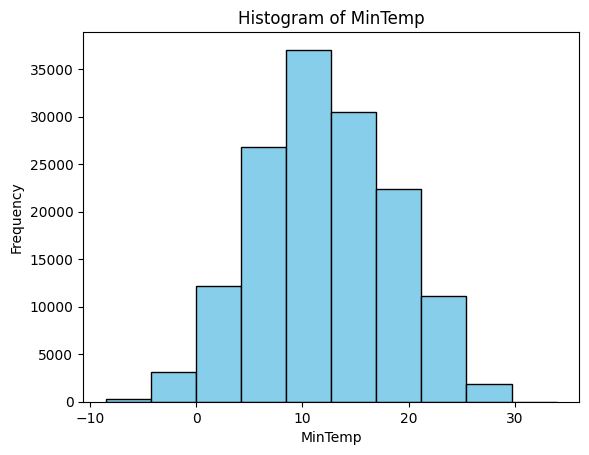

In [114]:
plt.hist(df['MinTemp'],bins=10,color='skyblue',edgecolor='black')
plt.title('Histogram of MinTemp')
plt.xlabel('MinTemp')
plt.ylabel('Frequency')

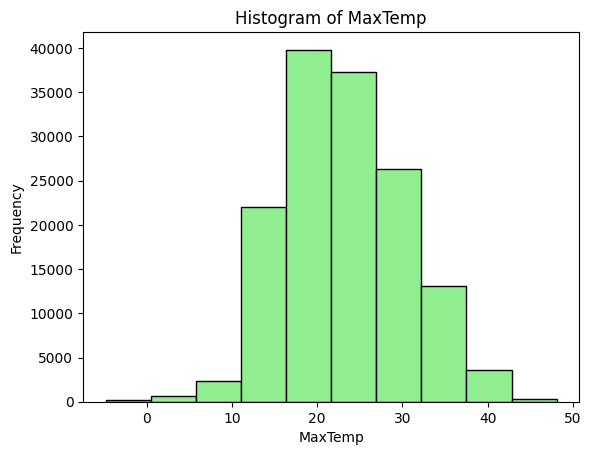

In [115]:
plt.hist(df['MaxTemp'],bins=10,color='lightgreen',edgecolor='black')
plt.title('Histogram of MaxTemp')
plt.xlabel('MaxTemp')
plt.ylabel('Frequency')
plt.show()

In [116]:
max_data_location=df['Location'].value_counts().reset_index()
max_data_location.columns=['Location','count']
max_data_location

,Location,count
0,Canberra,3436
1,Sydney,3344
2,Adelaide,3193
3,Darwin,3193
4,Brisbane,3193
5,Melbourne,3193
6,Perth,3193
7,Hobart,3193
8,Bendigo,3040
9,Ballarat,3040


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, 'Canberra'),
  Text(1, 0, 'Sydney'),
  Text(2, 0, 'Adelaide'),
  Text(3, 0, 'Darwin'),
  Text(4, 0, 'Brisbane'),
  Text(5, 0, 'Melbourne'),
  Text(6, 0, 'Perth'),
  Text(7, 0, 'Hobart'),
  Text(8, 0, 'Bendigo'),
  Text(9, 0, 'Ballarat'),
  Text(10, 0, 'Cairns'),
  Text(11, 0, 'GoldCoast'),
  Text(12, 0, 'MountGambier'),
  Text(13, 0, 'MountGinini'),
  Text(14, 0, 'Albany'),
  Text(15, 0, 'AliceSprings'),
  Text(16, 0, 'Albury'),
  Text(17, 0, 'Townsville'),
  Text(18, 0, 'Wollongong'),
  Text(19, 0, 'Launceston'),
  Text(20, 0, 'Tuggeranong'),
  Text(21, 0, 'Penrith'),
  Text(22, 0, 'Newcastle'),
  Text(23, 0, 'BadgerysCreek'),
  Text(24, 0, 'Dartmoor'),
  Text(25, 0, 'Witchcliffe'),
  Text(26

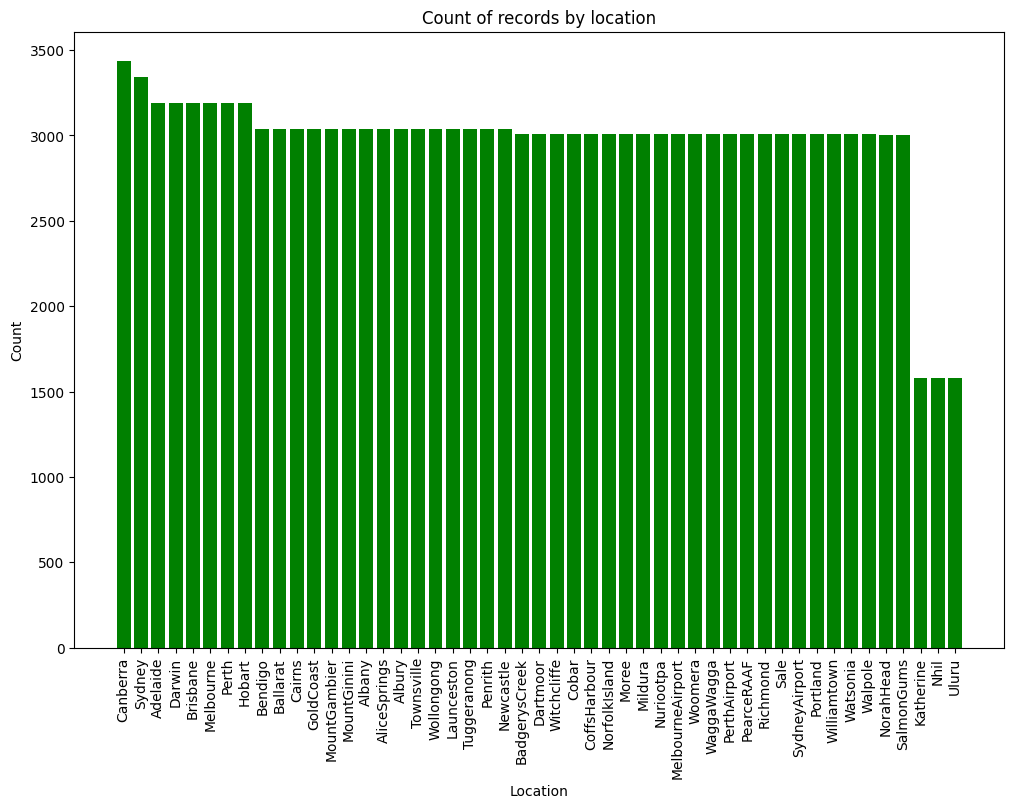

In [117]:
plt.figure(figsize=(12,8))
plt.bar(max_data_location['Location'],max_data_location['count'],color="green")
plt.title("Count of records by location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=90)

In [118]:
round(df['MinTemp'].mean(),2)

np.float64(12.19)

In [119]:
round(df['MaxTemp'].mean(),2)

np.float64(23.22)

In [120]:
rain_today=df['RainToday'].value_counts().reset_index()
print(rain_today)

  RainToday   count
0        No  113580
1       Yes   31880


In [121]:
rain_tomorrow=df['RainTomorrow'].value_counts().reset_index()
print(rain_tomorrow)

  RainTomorrow   count
0           No  113583
1          Yes   31877


In [122]:
mean_no=(rain_today[rain_today['RainToday']=='No']['count'].values[0]+
         rain_tomorrow[rain_tomorrow['RainTomorrow']=='No']['count'].values[0])/2

print(mean_no)

113581.5


In [123]:
mean_yes=(rain_today[rain_today['RainToday']=='Yes']['count'].values[0]+
         rain_tomorrow[rain_tomorrow['RainTomorrow']=='Yes']['count'].values[0])/2

print(mean_yes)

31878.5


Text(0.5, 1.0, 'Rain Today Distribution')

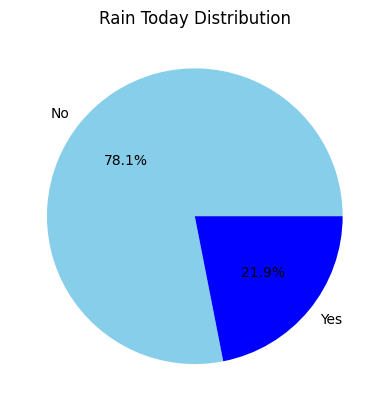

In [124]:
plt.pie(rain_today['count'],labels=rain_today['RainToday'],autopct='%1.1f%%',colors=['skyblue','blue'])
plt.title("Rain Today Distribution")

Text(0.5, 1.0, 'Rain Tomorrow Distribution')

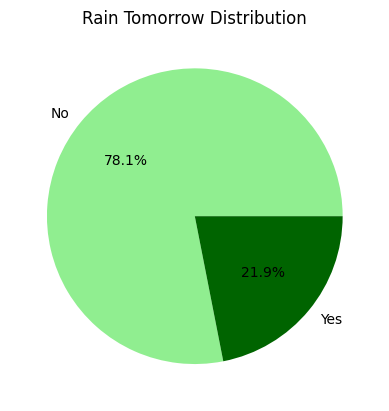

In [125]:
plt.pie(rain_tomorrow['count'],labels=rain_tomorrow['RainTomorrow'],autopct='%1.1f%%',colors=['lightgreen','darkgreen'])
plt.title('Rain Tomorrow Distribution')

Text(0.5, 1.0, 'rain today')

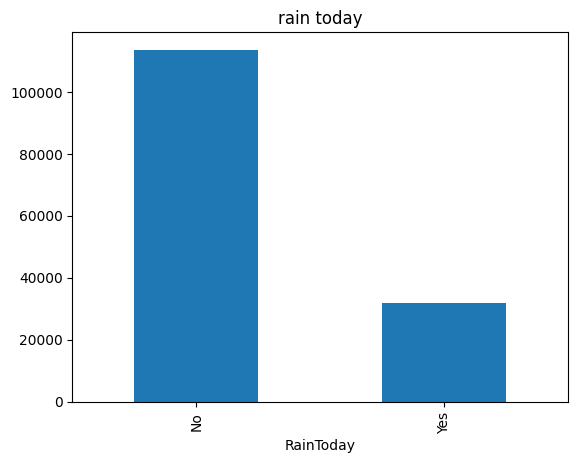

In [126]:
df['RainToday'].value_counts().plot(kind='bar')
plt.title('rain today')


Text(0.5, 1.0, 'rain tomorrow')

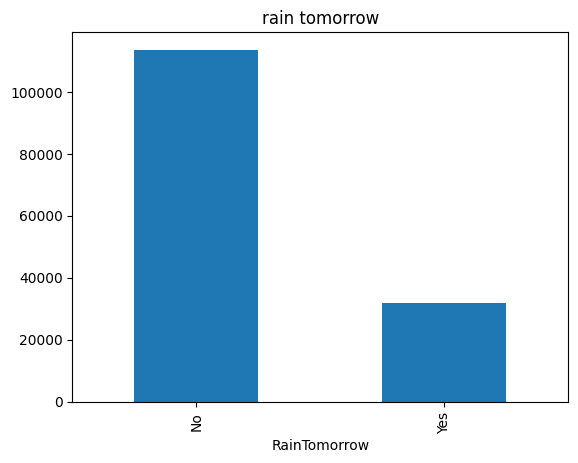

In [127]:

df['RainTomorrow'].value_counts().plot(kind='bar')
plt.title("rain tomorrow")

<Axes: >

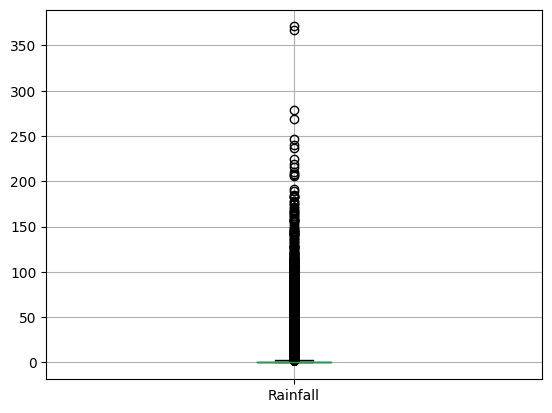

In [128]:
df.boxplot(column='Rainfall')

In [129]:
df['RainToday']=df['RainToday'].map({'Yes':1,"No":0})
df['RainTomorrow']=df['RainTomorrow'].map({'Yes':1,"No":0})
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,...,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,0,0
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,...,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,0,0
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.6,7.61,NE,52.0,NNE,...,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,0,1
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.8,7.61,NNE,50.0,NW,...,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,1,1
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.6,7.61,NW,30.0,WNW,...,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,1,1


In [130]:
df['Pressure_diff']=df['Pressure3pm']-df['Pressure9am']
df['Pressure_avg']=(df['Pressure3pm']+df['Pressure9am'])/2
df.drop(columns=['Pressure9am','Pressure3pm'],inplace=True)
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Pressure_diff,Pressure_avg
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,...,66.0,48.0,4.45,4.51,15.7,21.0,0,0,-3.7,1026.55
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,...,75.0,32.0,4.45,4.51,9.6,18.5,0,0,-3.1,1022.65


In [131]:
df['Temp_range']=df['MaxTemp']-df['MinTemp']
df['Temp_avg']=(df['MaxTemp']+df['MinTemp'])/2
df.drop(columns=['Temp9am','Temp3pm'],inplace=True)
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Pressure_diff,Pressure_avg,Temp_range,Temp_avg
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,...,66.0,48.0,4.45,4.51,0,0,-3.7,1026.55,10.4,16.00
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,...,75.0,32.0,4.45,4.51,0,0,-3.1,1022.65,15.3,11.35


In [132]:
df['Humidity_diff']=df['Humidity3pm']-df['Humidity9am']
df['Humidity_avg']=(df['Humidity3pm']+df['Humidity9am'])/2
df.drop(columns=['Humidity9am','Humidity3pm'],inplace=True)
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Pressure_diff,Pressure_avg,Temp_range,Temp_avg,Humidity_diff,Humidity_avg
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,...,4.45,4.51,0,0,-3.7,1026.55,10.4,16.00,-18.0,57.0
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,...,4.45,4.51,0,0,-3.1,1022.65,15.3,11.35,-43.0,53.5


In [133]:

df['Cloud_diff']=df['Cloud3pm']-df['Cloud9am']
df['Cloud_avg']=(df['Cloud3pm']+df['Cloud9am'])/2
df.drop(columns=['Cloud9am','Cloud3pm'],inplace=True)
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainToday,RainTomorrow,Pressure_diff,Pressure_avg,Temp_range,Temp_avg,Humidity_diff,Humidity_avg,Cloud_diff,Cloud_avg
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,...,0,0,-3.7,1026.55,10.4,16.00,-18.0,57.0,0.06,4.48
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,...,0,0,-3.1,1022.65,15.3,11.35,-43.0,53.5,0.06,4.48


In [134]:
df['WindSpeed_mean']=(df['WindSpeed3pm']+df['WindSpeed9am'])/2
df.drop(columns=['WindSpeed9am','WindSpeed3pm'],inplace=True)
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainTomorrow,Pressure_diff,Pressure_avg,Temp_range,Temp_avg,Humidity_diff,Humidity_avg,Cloud_diff,Cloud_avg,WindSpeed_mean
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,...,0,-3.7,1026.55,10.4,16.00,-18.0,57.0,0.06,4.48,8.0
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,...,0,-3.1,1022.65,15.3,11.35,-43.0,53.5,0.06,4.48,5.5


In [135]:
df['WindDir3pm'].unique()

array(['NW', 'NNE', 'NE', 'WNW', 'NNW', 'WSW', 'W', 'SW', 'N', 'SSW', 'E',
       'SSE', 'SE', 'S', 'ESE', 'ENE'], dtype=object)

In [136]:
wind_dir_map={
    'N':0,'NNE':22.5,'NE':45,'ENE':67.5,
    'E':90,'ESE':112.5,'SE':135,'SSE':157.5,
    'S':180,'SSW':202.5,'SW':225,'WSW':247.5,
    'W':270,'WNW':292.5,'NW':315,'NNW':337.5  }

In [137]:
for col in ['WindGustDir','WindDir9am','WindDir3pm']:
    df[col+'_angle']=df[col].map(wind_dir_map)


In [138]:
df.drop(columns=['WindGustDir','WindDir9am','WindDir3pm'],inplace=True)

In [139]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,RainTomorrow,...,Temp_range,Temp_avg,Humidity_diff,Humidity_avg,Cloud_diff,Cloud_avg,WindSpeed_mean,WindGustDir_angle,WindDir9am_angle,WindDir3pm_angle
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,22.0,0,0,...,10.4,16.00,-18.0,57.0,0.06,4.48,8.0,67.5,67.5,315.0
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,24.0,0,0,...,15.3,11.35,-43.0,53.5,0.06,4.48,5.5,0.0,0.0,22.5
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.6,7.61,52.0,0,1,...,6.2,12.70,16.0,43.0,0.06,4.48,14.5,45.0,22.5,45.0
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.8,7.61,50.0,1,1,...,5.4,12.80,-16.0,88.0,0.06,4.48,21.5,22.5,315.0,315.0
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.6,7.61,30.0,1,1,...,5.0,13.70,-19.0,79.5,0.06,4.48,14.0,315.0,292.5,292.5
